<a href="https://colab.research.google.com/github/anirudh-g/Msc-Data-science/blob/master/Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETUP

In [1]:
!pip3 install detecto

In [2]:
!pip install torch==1.4

     |████████████████████████████████| 753.4MB 21kB/s 
ERROR: torchvision 0.7.0+cu101 has requirement torch==1.6.0, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101


In [3]:
!pip install torchvision==0.5.0

     |████████████████████████████████| 4.0MB 3.4MB/s 
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [9]:
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/object detection')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [39]:
import tensorflow as tf
import cv2
import numpy as np
from PIL import Image
from keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import load_model

from detecto import core, utils, visualize
from detecto.utils import read_image

# LOAD IMAGE

In [62]:
from google.colab import files
uploaded = files.upload()

Saving swim2_wk8_fig017.png to swim2_wk8_fig017.png


In [158]:
path_to_image = 'swim2_wk8_fig017.png'

In [64]:
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

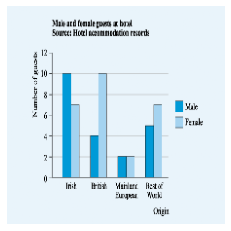

In [65]:
new_image = load_image(path_to_image, show=True)

BASELINE CNN

In [11]:
baseline = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/cnn baseline model')

In [87]:
classes = baseline.predict(new_image, verbose=1)

1/1 [==============================] - 0s 3ms/step


In [107]:
print(classes)

[[1.5465845e-18 2.9697824e-09 2.8352418e-27 1.0000000e+00 5.2790347e-20
  5.4333628e-30 0.0000000e+00]]


In [156]:
def plot_image(predictions_array, input_img):
  img = input_img[0]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ".format(class_names[predicted_label],
                                100*np.max(predictions_array)),
                                color='green')

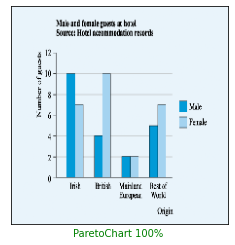

In [162]:
plot_image(classes[0], new_image)
plt.show()

# VGG16 - TRANSFER LEARNING

In [159]:
tl = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Transfer learning model')

In [160]:
classes_tl = tl.predict(new_image)

In [161]:
print(classes_tl)

[[4.3927706e-08 9.9999905e-01 1.0995642e-12 9.2240782e-07 1.1512648e-10
  1.7882193e-10 4.9117427e-10]]


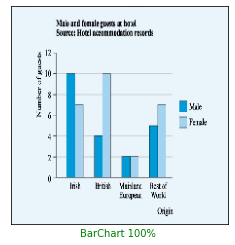

In [163]:
plot_image(classes_tl[0], new_image)
plt.show()

# OBJECT RECOGNITION

In [165]:
image2 = utils.read_image(path_to_image)

In [168]:
obj_det = core.Model.load('/content/drive/My Drive/Colab Notebooks/Obj det model noise.pth', ['title', 'legend', 'axis label'])

In [169]:
pred = obj_det.predict(image2)
label , box , score = pred

In [170]:
print(label)
print(box)
print(score)

['legend', 'title', 'axis label', 'axis label', 'axis label']
tensor([[358.9455, 130.3647, 422.8784, 170.2811],
        [ 88.7915,  15.4909, 297.3380,  43.5030],
        [ 51.5851,  58.9786,  69.3186, 155.3027],
        [309.7653, 274.5081, 351.6805, 292.1430],
        [370.8792, 151.5453, 423.2330, 169.7968]])
tensor([0.8877, 0.8455, 0.7813, 0.7297, 0.0614])


In [171]:
images =[]
images.append(image2)

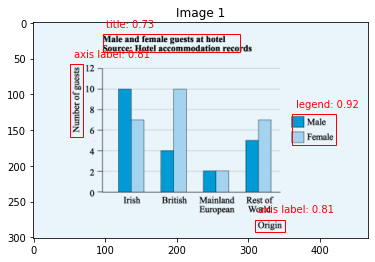

In [173]:
visualize.plot_prediction_grid(model2, images, score_filter=0.7)